In [2]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
file_path = "datasets/US_Accidents_March23.csv"
df = pd.read_csv(file_path)

print(f"Total rows: {df.shape[0]}")

Total rows: 7728394


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

### Crashes by Year

In [4]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract the year part
df['Year'] = df['Start_Time'].dt.year

# Count occurrences of crashes each year
yearly_crash_counts = df['Year'].value_counts().sort_values(ascending=False)

# Display the yearly crash counts
print(yearly_crash_counts)

Year
2021.0    1412433
2022.0    1268806
2020.0    1161598
2019.0     954302
2018.0     893426
2017.0     717290
2016.0     410821
2023.0     166552
Name: count, dtype: int64


Temp ranges during accidents by year

In [5]:


# Extract year from Start_Time
df['Year'] = pd.to_datetime(df['Start_Time']).dt.year

# Define temperature bins
bin_edges = np.arange(df['Temperature(F)'].min(), df['Temperature(F)'].max() + 5, 5)

# Categorize the data into bins
df['Temp_Range'] = pd.cut(df['Temperature(F)'], bins=bin_edges)

# Group by year and temperature range
grouped_data = df.groupby(['Year', 'Temp_Range'])

# Count occurrences in each group
temp_range_counts = grouped_data.size().reset_index(name='Accident_Count')

# Sort by year and temperature range
temp_range_counts_sorted = temp_range_counts.sort_values(['Year', 'Accident_Count'], ascending=[True, False])

# Print the top temperature ranges by year
for year, group in temp_range_counts_sorted.groupby('Year'):
    print(f"Year: {year}")
    print(group.head(10))  # Print top 10 temperature ranges for each year
    print()



Year: 2016.0
      Year    Temp_Range  Accident_Count
32  2016.0  (71.0, 76.0]           58545
33  2016.0  (76.0, 81.0]           48225
30  2016.0  (61.0, 66.0]           44613
31  2016.0  (66.0, 71.0]           41280
29  2016.0  (56.0, 61.0]           38807
34  2016.0  (81.0, 86.0]           38404
28  2016.0  (51.0, 56.0]           30364
35  2016.0  (86.0, 91.0]           24307
27  2016.0  (46.0, 51.0]           15969
26  2016.0  (41.0, 46.0]           12839

Year: 2017.0
      Year    Temp_Range  Accident_Count
92  2017.0  (71.0, 76.0]           94471
90  2017.0  (61.0, 66.0]           71302
93  2017.0  (76.0, 81.0]           70406
89  2017.0  (56.0, 61.0]           68477
91  2017.0  (66.0, 71.0]           66468
88  2017.0  (51.0, 56.0]           63490
94  2017.0  (81.0, 86.0]           52131
87  2017.0  (46.0, 51.0]           39336
86  2017.0  (41.0, 46.0]           34726
95  2017.0  (86.0, 91.0]           30918

Year: 2018.0
       Year    Temp_Range  Accident_Count
152  2018.0  (7

71 to 76 Degree Fahrenheit seems to be the temperature range with the highest occurences of accidents. The dataset for 2023 is incomplete and thus, shows divergence from this trend.

/var/folders/dl/cs1nq3qs437gw0zqqgdzx1980000gn/T/ipykernel_9544/1474889568.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_counts_top_15['Temp_Range'] = temp_counts_top_15['Temp_Range'].astype(str)


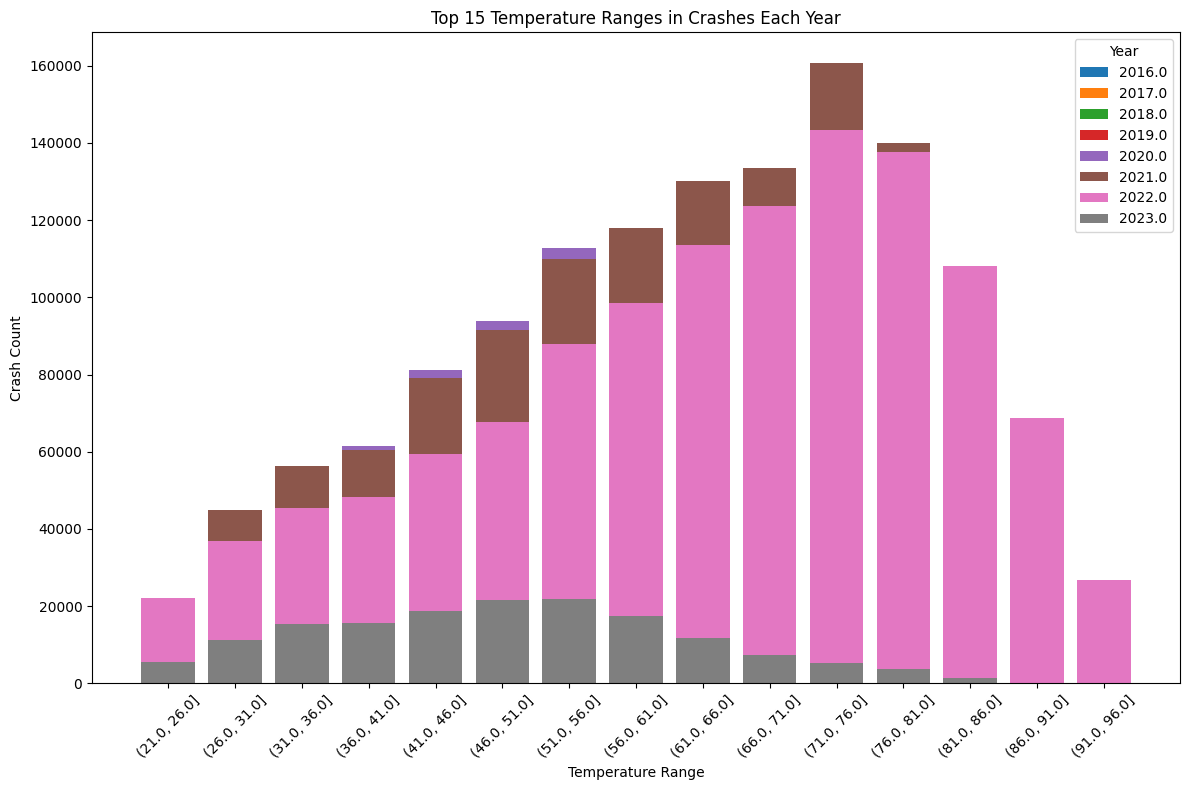

In [6]:
# Group the data by year and temperature range
grouped_data_temp = df.groupby(['Year', 'Temp_Range'])

# Count occurrences in each group
temp_counts = grouped_data_temp.size().reset_index(name='Crash_Count')

# Get the top 15 temperature ranges
top_15_ranges = temp_counts.groupby('Temp_Range')['Crash_Count'].sum().nlargest(15).index

# Filter temp_counts to include only the top 15 ranges
temp_counts_top_15 = temp_counts[temp_counts['Temp_Range'].isin(top_15_ranges)]

# Convert Temp_Range intervals to strings
temp_counts_top_15['Temp_Range'] = temp_counts_top_15['Temp_Range'].astype(str)

# Plot the top 15 temperature ranges in crashes each year
plt.figure(figsize=(12, 8))
for year, group in temp_counts_top_15.groupby('Year'):
    plt.bar(group['Temp_Range'], group['Crash_Count'], label=year)

plt.title('Top 15 Temperature Ranges in Crashes Each Year')
plt.xlabel('Temperature Range')
plt.ylabel('Crash Count')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.show()

In [7]:
bin_edges = np.arange(df['Temperature(F)'].min(), df['Temperature(F)'].max() + 5, 5)

# Categorize the data into bins
df['Temp_Range'] = pd.cut(df['Temperature(F)'], bins=bin_edges)

# Count occurrences in each bin
temp_range_counts = df['Temp_Range'].value_counts()

# Sort by most common and get the top 10
top_10_temp_ranges = temp_range_counts.head(20)
print(top_10_temp_ranges)

Temp_Range
(71.0, 76.0]      855377
(76.0, 81.0]      731953
(61.0, 66.0]      720492
(66.0, 71.0]      703493
(56.0, 61.0]      683742
(51.0, 56.0]      649753
(81.0, 86.0]      548573
(46.0, 51.0]      487750
(41.0, 46.0]      428629
(86.0, 91.0]      347861
(36.0, 41.0]      344145
(31.0, 36.0]      312009
(26.0, 31.0]      238587
(91.0, 96.0]      137909
(21.0, 26.0]      116986
(16.0, 21.0]       75971
(96.0, 101.0]      50466
(11.0, 16.0]       41868
(6.0, 11.0]        28015
(101.0, 106.0]     15332
Name: count, dtype: int64


### Weather conditions during crashes by Year

In [8]:
# Group by year and weather condition
grouped_data = df.groupby(['Year', 'Weather_Condition'])

# Count occurrences in each group
weather_condition_counts = grouped_data.size().reset_index(name='Crashes_Count')

# Print the top weather conditions by year
for year, group in weather_condition_counts.groupby('Year'):
    print(f"Year: {year}")
    print(group.sort_values('Crashes_Count', ascending=False).head(10))  # Print top 10 weather conditions for each year
    print()

Year: 2016.0
      Year Weather_Condition  Crashes_Count
4   2016.0             Clear         174360
40  2016.0          Overcast          57429
37  2016.0     Mostly Cloudy          53653
41  2016.0     Partly Cloudy          41893
48  2016.0  Scattered Clouds          40289
27  2016.0        Light Rain          14177
13  2016.0              Haze           4848
44  2016.0              Rain           2938
31  2016.0        Light Snow           2392
8   2016.0              Fair           2361

Year: 2017.0
       Year Weather_Condition  Crashes_Count
63   2017.0             Clear         260291
112  2017.0          Overcast         115082
109  2017.0     Mostly Cloudy         103604
113  2017.0     Partly Cloudy          71210
120  2017.0  Scattered Clouds          68859
95   2017.0        Light Rain          34125
100  2017.0        Light Snow           8611
116  2017.0              Rain           7747
74   2017.0              Haze           7474
70   2017.0               Fog          

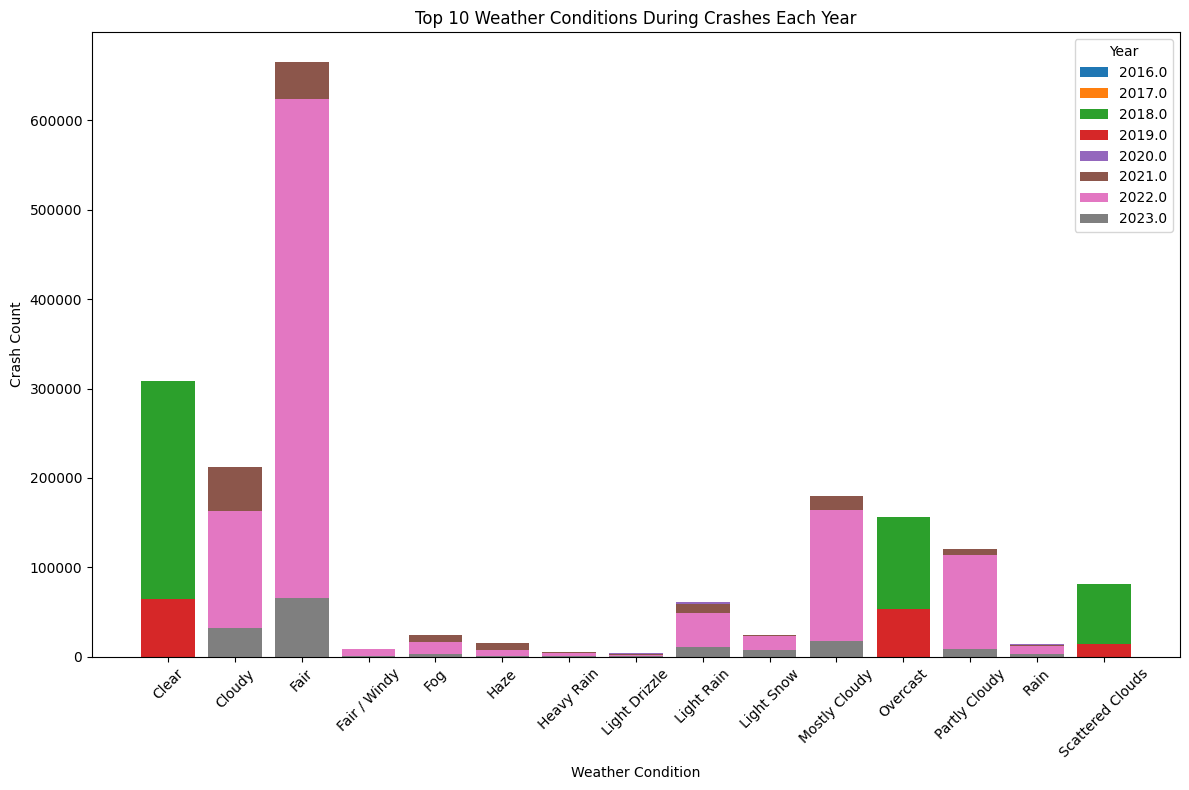

In [9]:
# Group the data by year and weather condition
grouped_data_weather = df.groupby(['Year', 'Weather_Condition'])

# Count occurrences in each group
weather_counts = grouped_data_weather.size().reset_index(name='Crash_Count')

# Get the top 10 weather conditions
top_10_conditions = weather_counts.groupby('Weather_Condition')['Crash_Count'].sum().nlargest(15).index

# Filter weather_counts to include only the top 10 conditions
weather_counts_top_10 = weather_counts[weather_counts['Weather_Condition'].isin(top_10_conditions)]

# Plot the top 10 weather conditions during crashes each year
plt.figure(figsize=(12, 8))
for year, group in weather_counts_top_10.groupby('Year'):
    plt.bar(group['Weather_Condition'], group['Crash_Count'], label=year)

plt.title('Top 10 Weather Conditions During Crashes Each Year')
plt.xlabel('Weather Condition')
plt.ylabel('Crash Count')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.show()

### Same analysis, different graph

In [10]:
import pandas as pd

# Assuming df is your DataFrame containing the accident data

# Convert 'Start_Time' to datetime if not already
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Extract year from 'Start_Time'
df['Year'] = df['Start_Time'].dt.year

# Group by year and weather condition, then count accidents
accidents_by_weather = df.groupby(['Year', 'Weather_Condition']).size().reset_index(name='Count')

# Sort the counts within each year by descending order and select top 5 for each year
top_conditions_per_year = accidents_by_weather.groupby('Year').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

print("Top 5 Weather Conditions Ranked by Crashes Per Year:")
print(top_conditions_per_year)



Top 5 Weather Conditions Ranked by Crashes Per Year:
      Year Weather_Condition   Count
0   2016.0             Clear  174360
1   2016.0          Overcast   57429
2   2016.0     Mostly Cloudy   53653
3   2016.0     Partly Cloudy   41893
4   2016.0  Scattered Clouds   40289
5   2017.0             Clear  260291
6   2017.0          Overcast  115082
7   2017.0     Mostly Cloudy  103604
8   2017.0     Partly Cloudy   71210
9   2017.0  Scattered Clouds   68859
10  2018.0             Clear  308315
11  2018.0          Overcast  156829
12  2018.0     Mostly Cloudy  126323
13  2018.0     Partly Cloudy   81823
14  2018.0  Scattered Clouds   81054
15  2019.0              Fair  327283
16  2019.0     Mostly Cloudy  129257
17  2019.0            Cloudy  112851
18  2019.0     Partly Cloudy  100700
19  2019.0             Clear   65265
20  2020.0              Fair  516782
21  2020.0            Cloudy  192008
22  2020.0     Mostly Cloudy  148452
23  2020.0     Partly Cloudy   95845
24  2020.0        Ligh

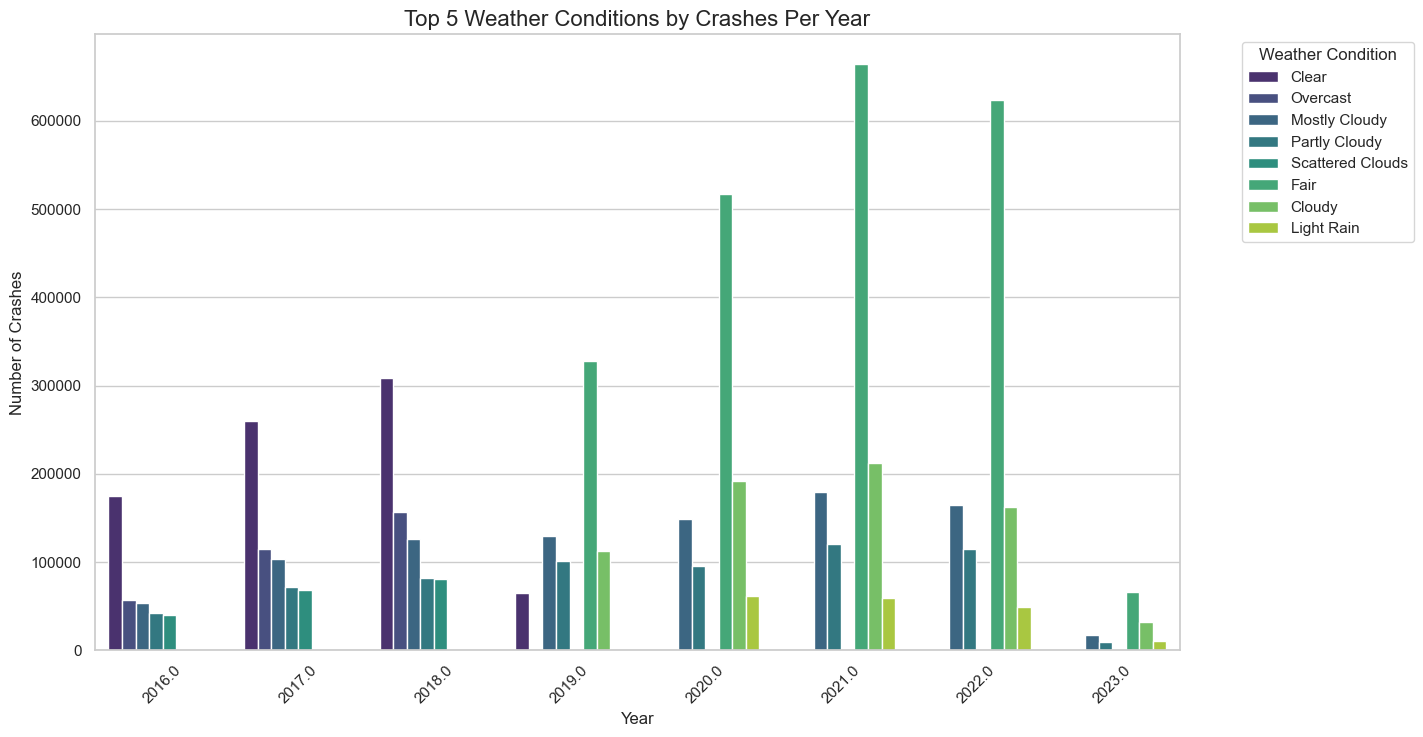

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(14, 8))  # Set the figure size
chart = sns.barplot(x='Year', y='Count', hue='Weather_Condition', data=top_conditions_per_year,
                    palette='viridis')  # Use a suitable palette for clarity

plt.title('Top 5 Weather Conditions by Crashes Per Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of Crashes', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Weather Condition', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend out of the plot

plt.show()


### More general Temperature range ranking

In [6]:
import pandas as pd

# Assuming df is your DataFrame containing the accident data

# Step 1: Convert 'Start_Time' to datetime if not already and check 'Temperature(F)'
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')

# Step 2: Extract year
df['Year'] = df['Start_Time'].dt.year

# Step 3: Categorize temperature into ranges
temperature_bins = [-float('inf'), 32, 50, 68, 86, 104, float('inf')]
bin_labels = ['Below Freezing (<32°F)', 'Cold (32-50°F)', 'Mild (50-68°F)', 'Warm (68-86°F)', 'Hot (86-104°F)', 'Extreme Heat (>104°F)']
df['Temperature_Range'] = pd.cut(df['Temperature(F)'], bins=temperature_bins, labels=bin_labels)

# Step 4: Group by year and temperature range, then count accidents
accidents_by_temp = df.groupby(['Year', 'Temperature_Range']).size()

# Step 5: Find the temperature range with the most accidents for each year
top_temp_ranges = accidents_by_temp.reset_index(name='Count').groupby('Year').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

print("Temperature Ranges with Most Accidents by Year:")
print(top_temp_ranges)


Temperature Ranges with Most Accidents by Year:
      Year       Temperature_Range   Count
0   2016.0          Warm (68-86°F)  163960
1   2016.0          Mild (50-68°F)  136492
2   2016.0          Cold (32-50°F)   47217
3   2016.0          Hot (86-104°F)   41126
4   2016.0  Below Freezing (<32°F)   15164
5   2017.0          Warm (68-86°F)  247980
6   2017.0          Mild (50-68°F)  239498
7   2017.0          Cold (32-50°F)  119876
8   2017.0          Hot (86-104°F)   50016
9   2017.0  Below Freezing (<32°F)   44618
10  2018.0          Warm (68-86°F)  293352
11  2018.0          Mild (50-68°F)  272838
12  2018.0          Cold (32-50°F)  167668
13  2018.0  Below Freezing (<32°F)   76964
14  2018.0          Hot (86-104°F)   63208
15  2019.0          Mild (50-68°F)  308949
16  2019.0          Warm (68-86°F)  287728
17  2019.0          Cold (32-50°F)  183104
18  2019.0  Below Freezing (<32°F)   85232
19  2019.0          Hot (86-104°F)   70875
20  2020.0          Mild (50-68°F)  406141
21  20

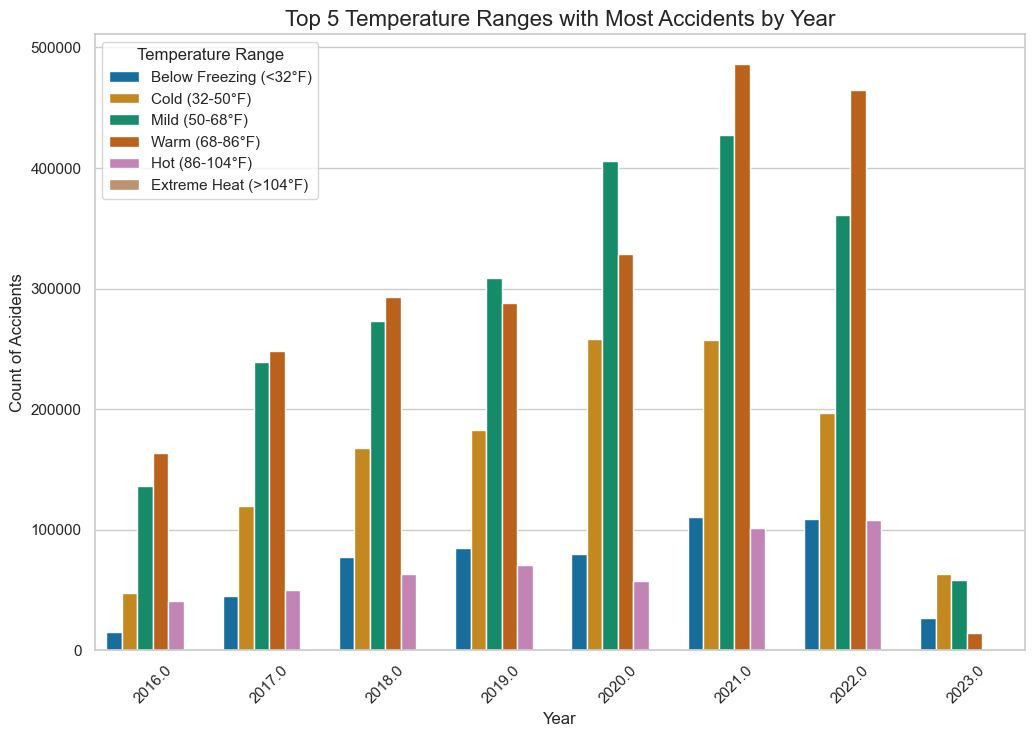

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the aesthetics for the plot
sns.set(style="whitegrid")

# Creating the plot
plt.figure(figsize=(12, 8))  # Set the figure size
chart = sns.barplot(x='Year', y='Count', hue='Temperature_Range', data=top_temp_ranges, palette='colorblind')

# Adding titles and labels
plt.title('Top 5 Temperature Ranges with Most Accidents by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Accidents', fontsize=12)
plt.legend(title='Temperature Range')

# Rotating the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()


### States ranked by crashes in each Year

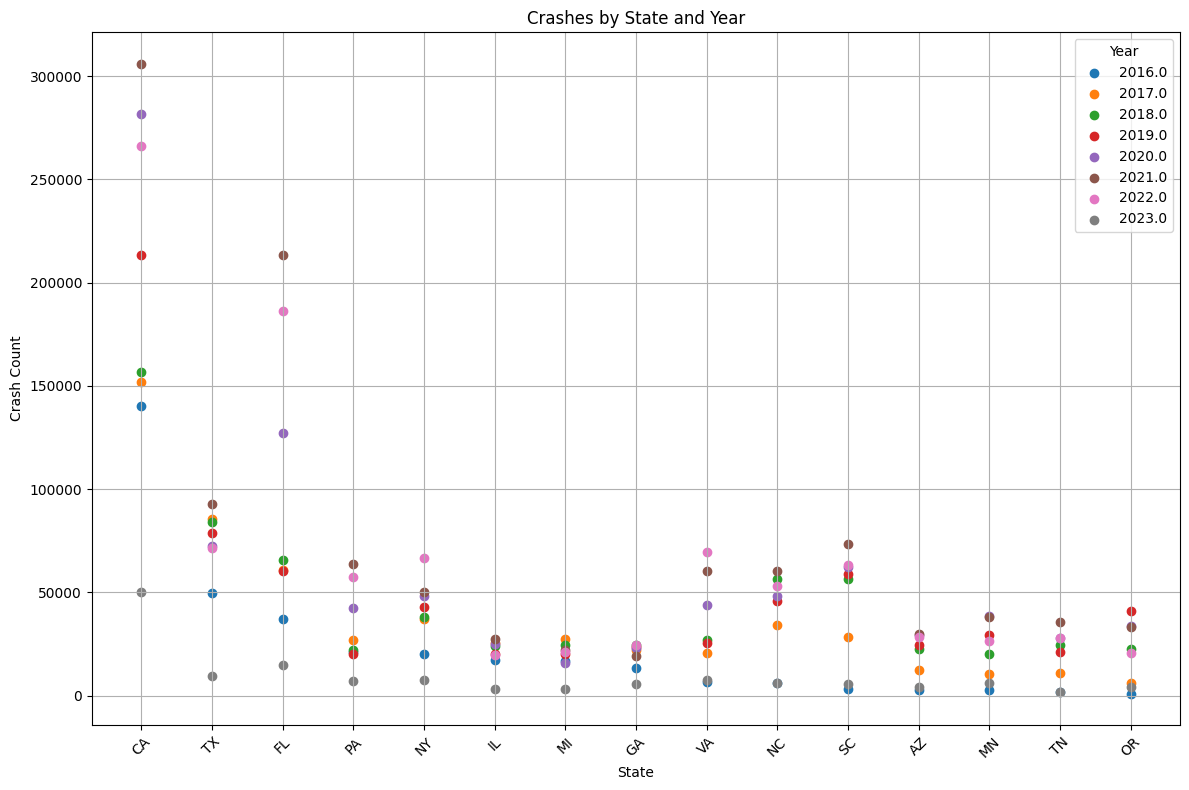

In [12]:
grouped_data = df.groupby(['Year', 'State'])

# Count occurrences in each group
state_crash_counts = grouped_data.size().reset_index(name='Crash_Count')
# Rank states by crashes within each year
state_rankings = state_crash_counts.groupby('Year').apply(lambda x: x.sort_values(by='Crash_Count', ascending=False)).reset_index(drop=True)

# Get top 15 states with the largest crashes
top_states = state_crash_counts.groupby('State')['Crash_Count'].sum().nlargest(15).index

# Filter state_rankings to include only the top 15 states
state_rankings_top = state_rankings[state_rankings['State'].isin(top_states)]

plt.figure(figsize=(12, 8))
for year, group in state_rankings_top.groupby('Year'):
    plt.scatter(group['State'], group['Crash_Count'], label=year)
    for index, row in group.iterrows():
        #plt.annotate(row['Crash_Count'], (row['State'], row['Crash_Count']), textcoords="offset points", xytext=(0,10), ha='center')
        pass
plt.title('Crashes by State and Year')
plt.xlabel('State')
plt.ylabel('Crash Count')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.grid(True)
plt.show()

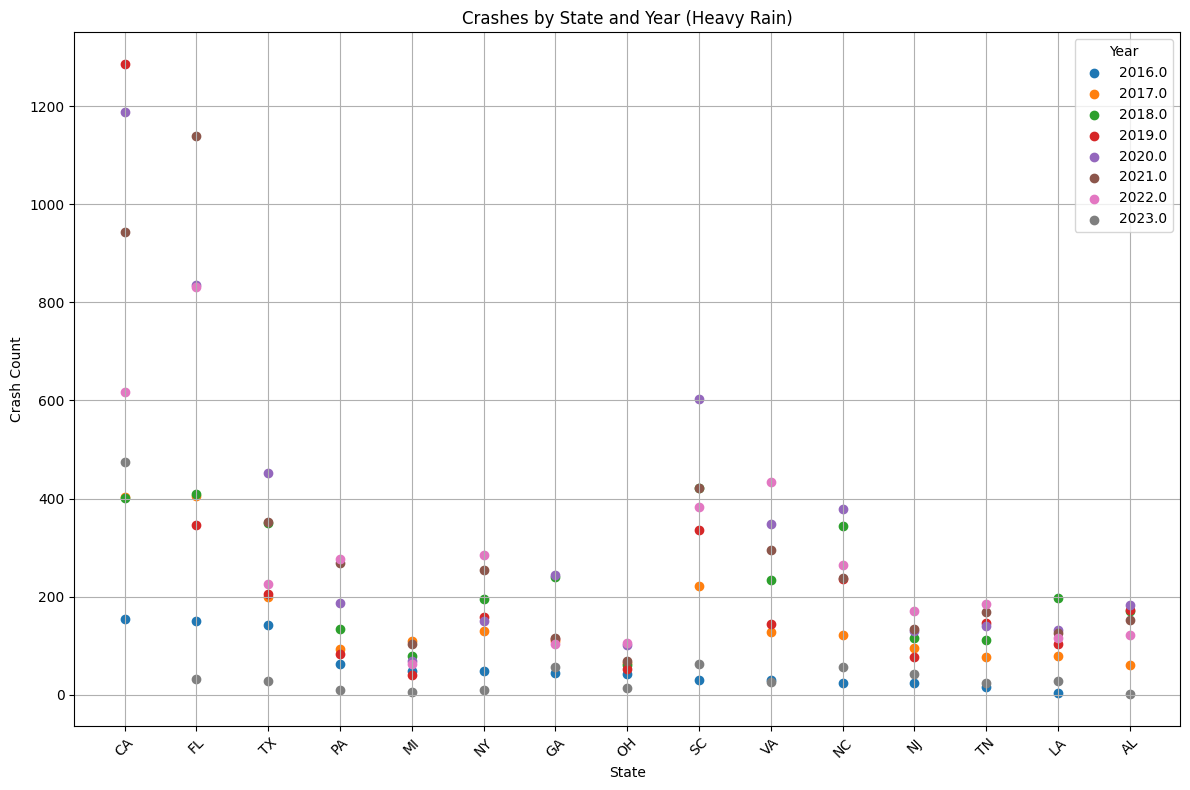

In [13]:
# Group by year and state
heavy_rain = df[df['Weather_Condition'] == 'Heavy Rain']

grouped_data = heavy_rain.groupby(['Year', 'State'])

# Count occurrences in each group
state_crash_counts = grouped_data.size().reset_index(name='Crash_Count')

# Rank states by crashes within each year
state_rankings = state_crash_counts.groupby('Year').apply(lambda x: x.sort_values(by='Crash_Count', ascending=False)).reset_index(drop=True)

# Get top 15 states with the largest crashes
top_states = state_crash_counts.groupby('State')['Crash_Count'].sum().nlargest(15).index

# Filter state_rankings to include only the top 15 states
state_rankings_top = state_rankings[state_rankings['State'].isin(top_states)]

# Plot the scatter plots with annotations
plt.figure(figsize=(12, 8))
for year, group in state_rankings_top.groupby('Year'):
    plt.scatter(group['State'], group['Crash_Count'], label=year)
    for index, row in group.iterrows():
        #plt.annotate(row['Crash_Count'], (row['State'], row['Crash_Count']), textcoords="offset points", xytext=(0,10), ha='center')
        pass
plt.title('Crashes by State and Year (Heavy Rain)')
plt.xlabel('State')
plt.ylabel('Crash Count')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.grid(True)
plt.show()

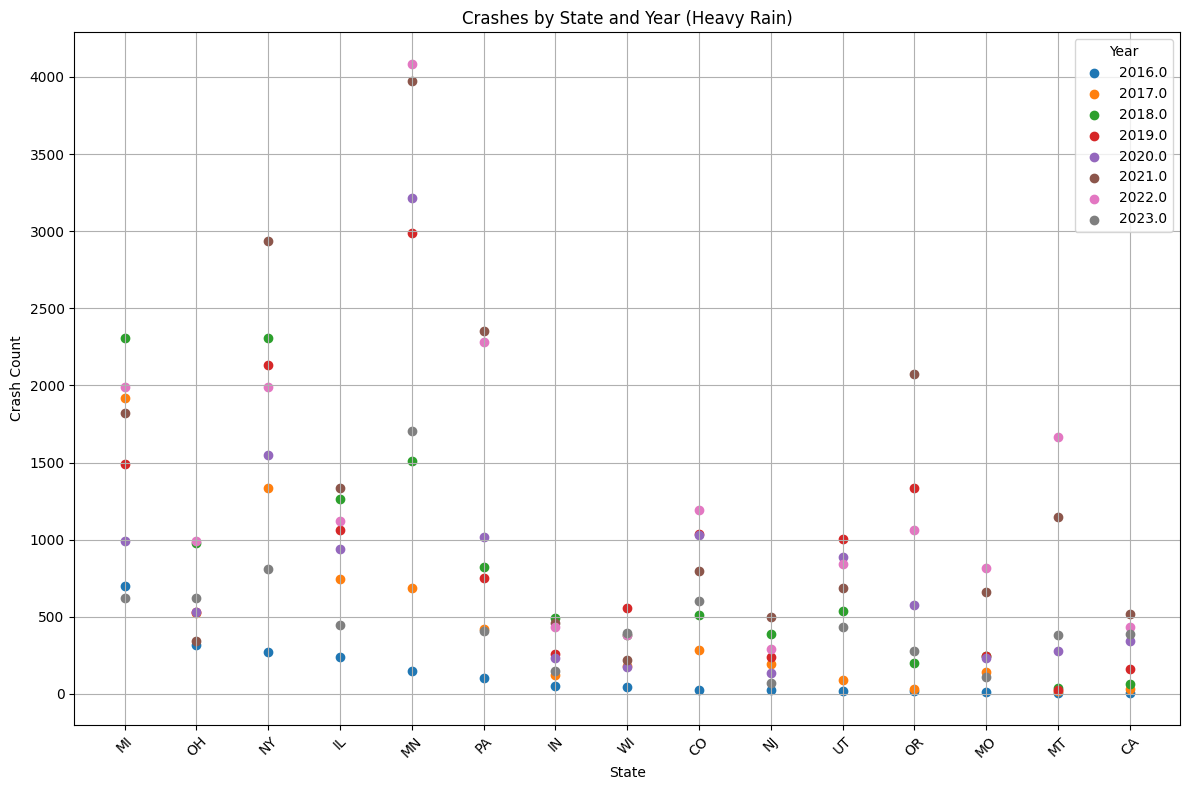

In [14]:
# Group by year and state
heavy_rain = df[df['Weather_Condition'] == 'Light Snow']

grouped_data = heavy_rain.groupby(['Year', 'State'])

# Count occurrences in each group
state_crash_counts = grouped_data.size().reset_index(name='Crash_Count')

# Rank states by crashes within each year
state_rankings = state_crash_counts.groupby('Year').apply(lambda x: x.sort_values(by='Crash_Count', ascending=False)).reset_index(drop=True)

# Get top 15 states with the largest crashes
top_states = state_crash_counts.groupby('State')['Crash_Count'].sum().nlargest(15).index

# Filter state_rankings to include only the top 15 states
state_rankings_top = state_rankings[state_rankings['State'].isin(top_states)]

# Plot the scatter plots with annotations
plt.figure(figsize=(12, 8))
for year, group in state_rankings_top.groupby('Year'):
    plt.scatter(group['State'], group['Crash_Count'], label=year)
    for index, row in group.iterrows():
        #plt.annotate(row['Crash_Count'], (row['State'], row['Crash_Count']), textcoords="offset points", xytext=(0,10), ha='center')
        pass
plt.title('Crashes by State and Year (Heavy Rain)')
plt.xlabel('State')
plt.ylabel('Crash Count')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.grid(True)
plt.show()

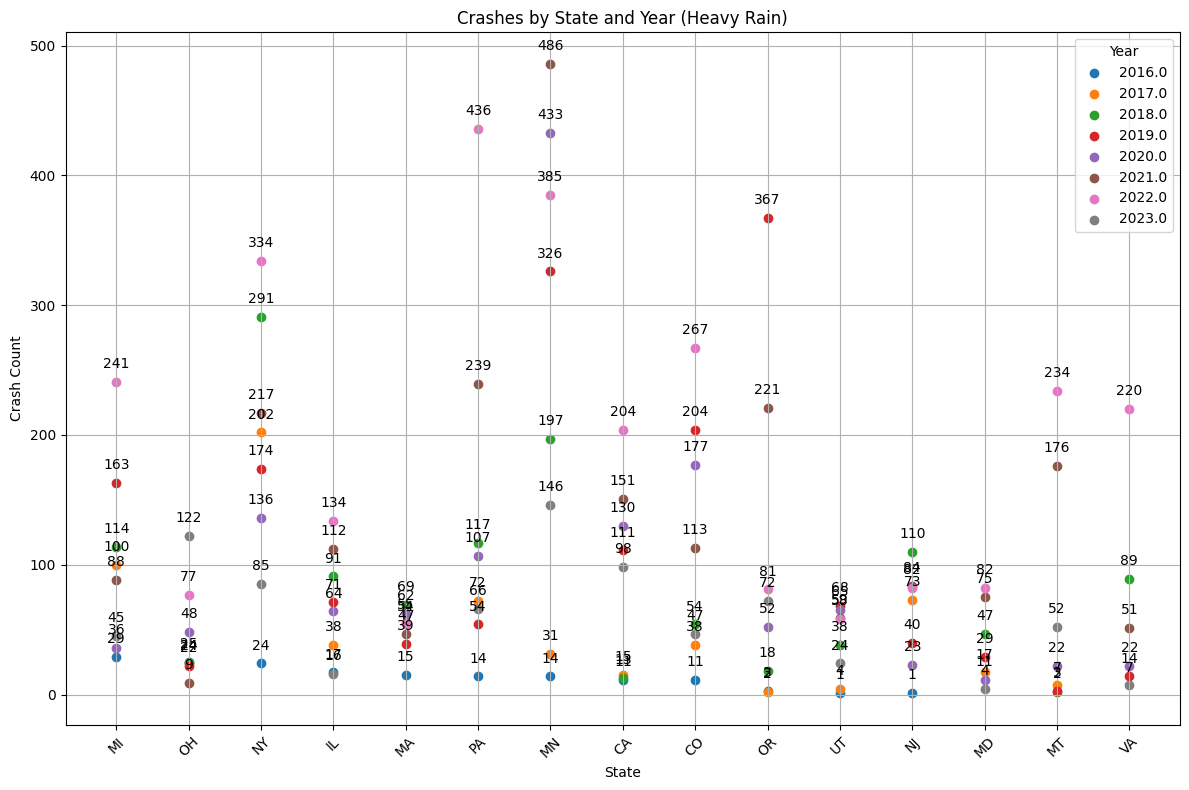

In [15]:
# Group by year and state
heavy_rain = df[df['Weather_Condition'] == 'Snow']

grouped_data = heavy_rain.groupby(['Year', 'State'])

# Count occurrences in each group
state_crash_counts = grouped_data.size().reset_index(name='Crash_Count')

# Rank states by crashes within each year
state_rankings = state_crash_counts.groupby('Year').apply(lambda x: x.sort_values(by='Crash_Count', ascending=False)).reset_index(drop=True)

# Get top 15 states with the largest crashes
top_states = state_crash_counts.groupby('State')['Crash_Count'].sum().nlargest(15).index

# Filter state_rankings to include only the top 15 states
state_rankings_top = state_rankings[state_rankings['State'].isin(top_states)]

# Plot the scatter plots with annotations
plt.figure(figsize=(12, 8))
for year, group in state_rankings_top.groupby('Year'):
    plt.scatter(group['State'], group['Crash_Count'], label=year)
    for index, row in group.iterrows():
        plt.annotate(row['Crash_Count'], (row['State'], row['Crash_Count']), textcoords="offset points", xytext=(0,10), ha='center')

plt.title('Crashes by State and Year (Heavy Rain)')
plt.xlabel('State')
plt.ylabel('Crash Count')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.grid(True)
plt.show()

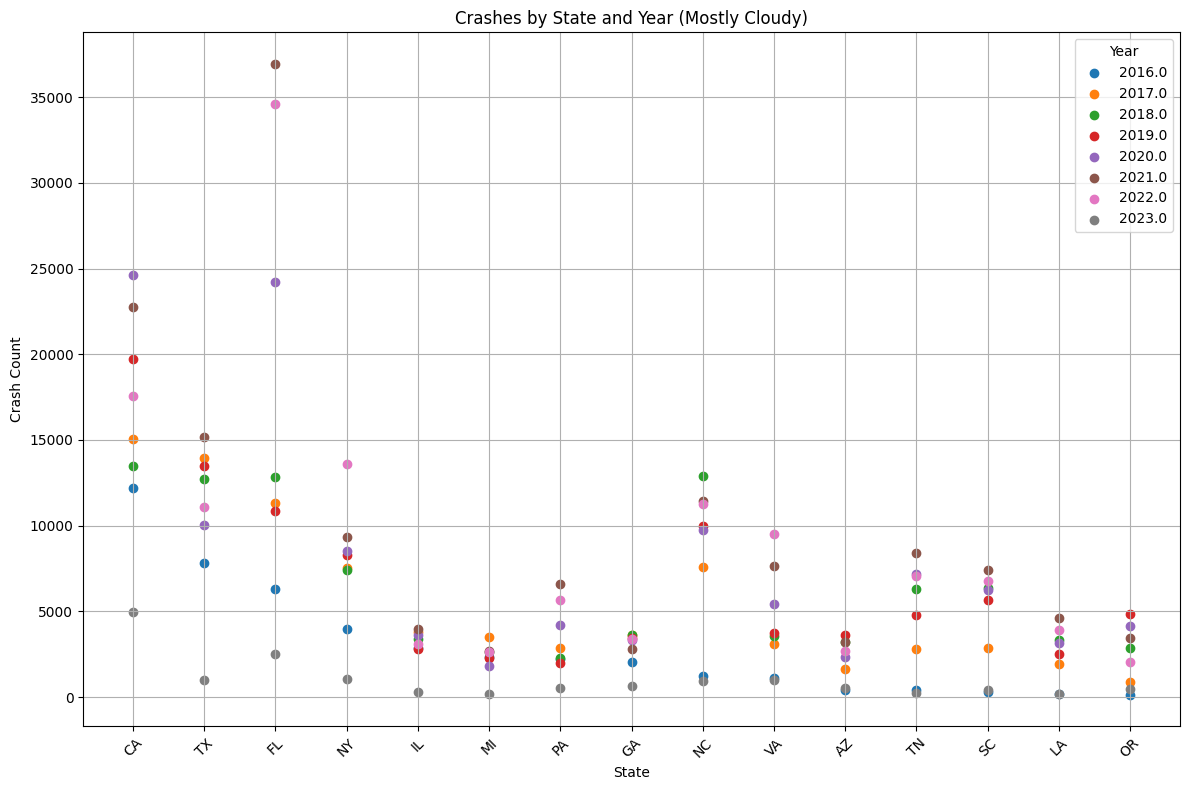

In [17]:
# Group by year and state
heavy_rain = df[df['Weather_Condition'] == 'Mostly Cloudy']

grouped_data = heavy_rain.groupby(['Year', 'State'])

# Count occurrences in each group
state_crash_counts = grouped_data.size().reset_index(name='Crash_Count')

# Rank states by crashes within each year
state_rankings = state_crash_counts.groupby('Year').apply(lambda x: x.sort_values(by='Crash_Count', ascending=False)).reset_index(drop=True)

# Get top 15 states with the largest crashes
top_states = state_crash_counts.groupby('State')['Crash_Count'].sum().nlargest(15).index

# Filter state_rankings to include only the top 15 states
state_rankings_top = state_rankings[state_rankings['State'].isin(top_states)]

# Plot the scatter plots with annotations
plt.figure(figsize=(12, 8))
for year, group in state_rankings_top.groupby('Year'):
    plt.scatter(group['State'], group['Crash_Count'], label=year)
    for index, row in group.iterrows():
        #plt.annotate(row['Crash_Count'], (row['State'], row['Crash_Count']), textcoords="offset points", xytext=(0,10), ha='center')
        pass
plt.title('Crashes by State and Year (Mostly Cloudy)')
plt.xlabel('State')
plt.ylabel('Crash Count')
plt.xticks(rotation=45)
plt.legend(title='Year', loc='upper right')
plt.tight_layout()
plt.grid(True)
plt.show()

### Top accident days by year

In [13]:
# Step 1: Convert 'Start_Time' to datetime if not already
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Step 2: Extract day of week and year
df['Year'] = df['Start_Time'].dt.year
df['Day_of_Week'] = df['Start_Time'].dt.day_name()  # This returns the day name

# Step 3: Group by year and day of week and count accidents
accident_counts = df.groupby(['Year', 'Day_of_Week']).size()

# Step 4: Find the day with the most accidents for each year
top_days = accident_counts.reset_index(name='Count').groupby('Year').apply(lambda x: x.nlargest(7, 'Count'))

# Optional: Drop the level added by groupby().apply()
top_days = top_days.reset_index(drop=True)

print(top_days)


      Year Day_of_Week   Count
0   2016.0     Tuesday   77686
1   2016.0   Wednesday   76467
2   2016.0    Thursday   75782
3   2016.0      Friday   71856
4   2016.0      Monday   68809
5   2016.0    Saturday   21020
6   2016.0      Sunday   19201
7   2017.0      Friday  134322
8   2017.0    Thursday  132623
9   2017.0   Wednesday  131284
10  2017.0     Tuesday  129988
11  2017.0      Monday  120851
12  2017.0    Saturday   35926
13  2017.0      Sunday   32296
14  2018.0     Tuesday  165040
15  2018.0      Friday  163337
16  2018.0   Wednesday  161545
17  2018.0      Monday  157998
18  2018.0    Thursday  154322
19  2018.0    Saturday   48889
20  2018.0      Sunday   42295
21  2019.0     Tuesday  171373
22  2019.0      Friday  168507
23  2019.0   Wednesday  168431
24  2019.0    Thursday  163729
25  2019.0      Monday  159869
26  2019.0    Saturday   64557
27  2019.0      Sunday   57836
28  2020.0    Thursday  201812
29  2020.0      Friday  196952
30  2020.0   Wednesday  193965
31  2020

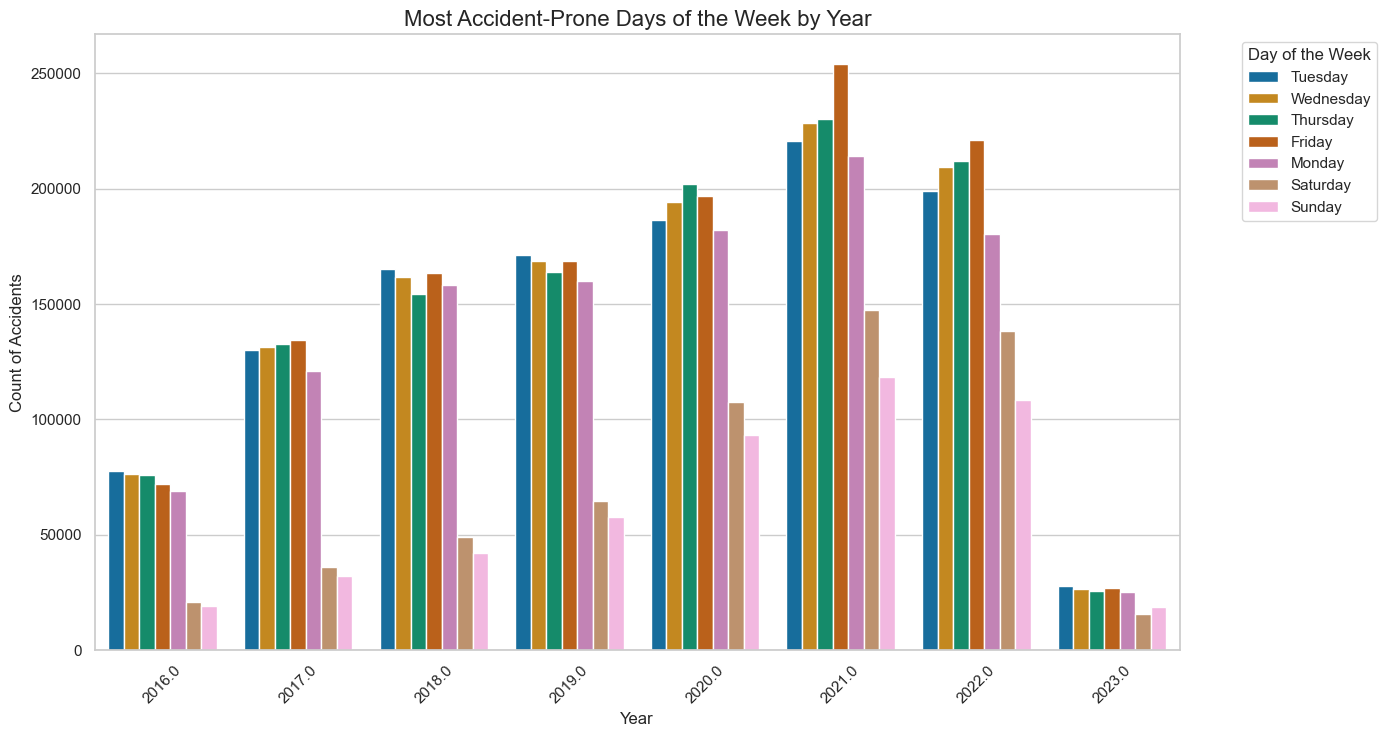

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'top_days' DataFrame from your provided pandas code

# Setting up the aesthetics for the plot
sns.set(style="whitegrid")

# Creating the plot
plt.figure(figsize=(14, 8))  # Set the figure size
chart = sns.barplot(x='Year', y='Count', hue='Day_of_Week', data=top_days, palette='colorblind')

# Adding titles and labels
plt.title('Most Accident-Prone Days of the Week by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend out of the plot to avoid overlapping with the bars

# Display the plot
plt.show()


### Top accident hours / months by year

In [16]:


# Step 1: Convert 'Start_Time' to datetime if not already
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Step 2: Extract year, month, and hour
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Hour'] = df['Start_Time'].dt.hour

# Step 3a: Group by year and hour, then count accidents
accident_counts_by_hour = df.groupby(['Year', 'Hour']).size()

# Step 4a: Find the top accident hour for each year
top_hours = accident_counts_by_hour.reset_index(name='Count').groupby('Year').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

# Step 3b: Group by year and month, then count accidents
accident_counts_by_month = df.groupby(['Year', 'Month']).size()

# Step 4b: Find the top accident month for each year
top_months = accident_counts_by_month.reset_index(name='Count').groupby('Year').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

print("Top Accident Hours by Year:")
print(top_hours)
print("\nTop Accident Months by Year:")
print(top_months)


Top Accident Hours by Year:
      Year  Hour   Count
0   2016.0   8.0   30853
1   2016.0  17.0   28816
2   2016.0   9.0   27329
3   2016.0   7.0   26730
4   2016.0  16.0   26576
5   2017.0   8.0   64297
6   2017.0   7.0   60752
7   2017.0  17.0   55173
8   2017.0  16.0   52497
9   2017.0  15.0   44538
10  2018.0   8.0   90699
11  2018.0   7.0   89538
12  2018.0  17.0   66996
13  2018.0  16.0   65892
14  2018.0   6.0   55503
15  2019.0   8.0   98641
16  2019.0   7.0   96733
17  2019.0  17.0   70774
18  2019.0  16.0   67719
19  2019.0   6.0   60156
20  2020.0  16.0   78139
21  2020.0  17.0   75747
22  2020.0   7.0   74372
23  2020.0   8.0   72339
24  2020.0  15.0   69100
25  2021.0  16.0  110125
26  2021.0  17.0  105732
27  2021.0  15.0  101680
28  2021.0   7.0   96190
29  2021.0   8.0   92090
30  2022.0  16.0  107043
31  2022.0  15.0  102574
32  2022.0  17.0  101831
33  2022.0   7.0   90804
34  2022.0  14.0   86112
35  2023.0  15.0   12352
36  2023.0  16.0   12186
37  2023.0   7.0   116

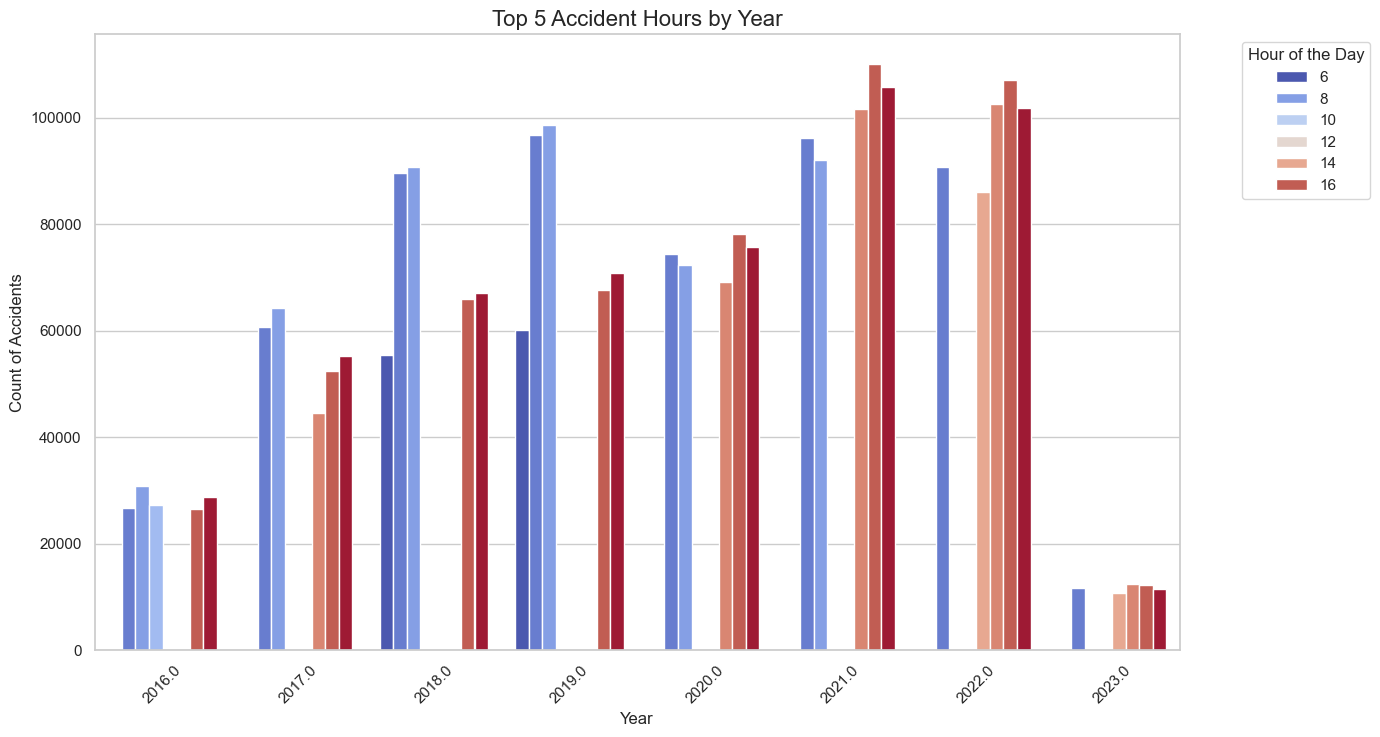

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'top_hours' DataFrame from your provided pandas code

# Setting up the aesthetics for the plot
sns.set(style="whitegrid")

# Creating the plot for Top Accident Hours
plt.figure(figsize=(14, 8))  # Set the figure size
hour_chart = sns.barplot(x='Year', y='Count', hue='Hour', data=top_hours, palette='coolwarm')

# Adding titles and labels
plt.title('Top 5 Accident Hours by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Hour of the Day', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend out of the plot

# Display the plot
plt.show()


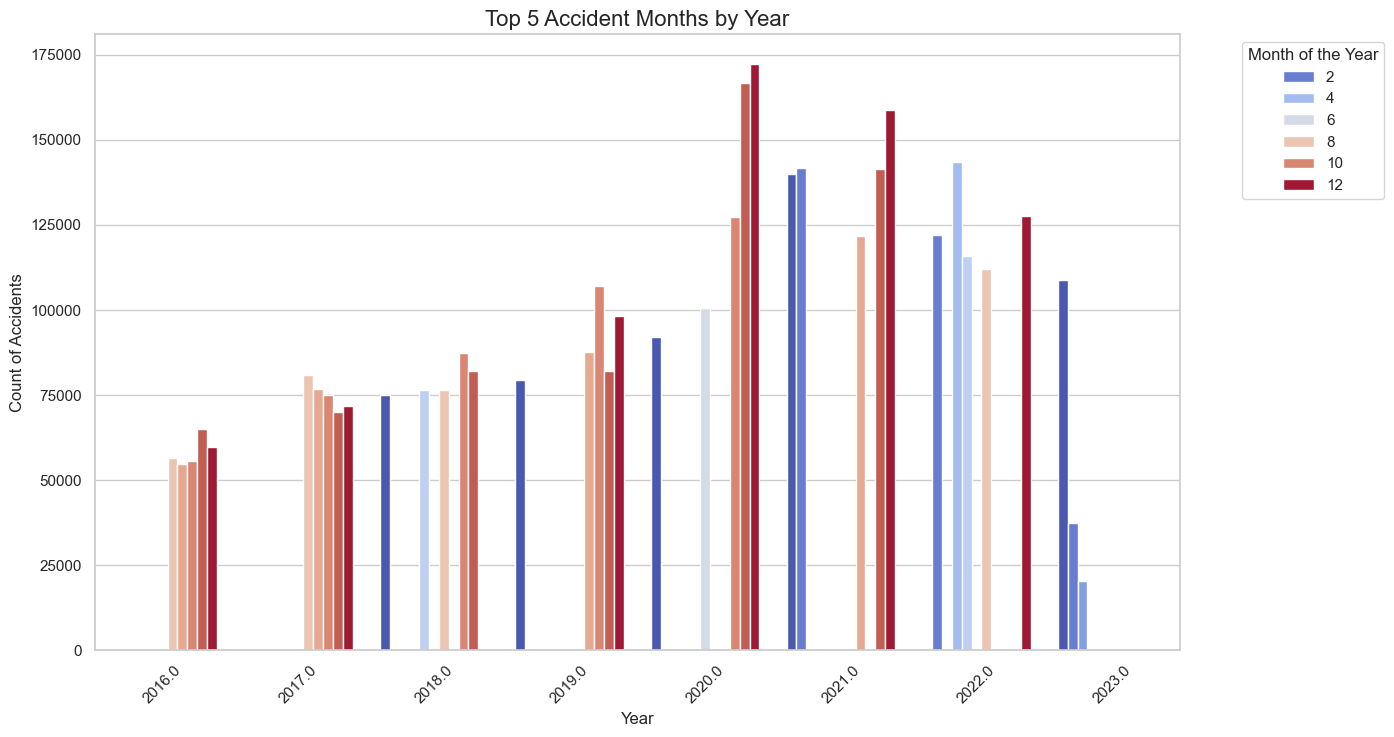

In [18]:
# Creating the plot for Top Accident Months
plt.figure(figsize=(14, 8))  # Set the figure size
month_chart = sns.barplot(x='Year', y='Count', hue='Month', data=top_months, palette='coolwarm')

# Adding titles and labels
plt.title('Top 5 Accident Months by Year', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Month of the Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend out of the plot

# Display the plot
plt.show()


### Use labels for month instead of numbers

In [20]:
import pandas as pd
import calendar

# Assuming df is your DataFrame with the accident data

# Convert 'Start_Time' to datetime if not already
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

# Extract year, month, and hour
df['Year'] = df['Start_Time'].dt.year
df['Month'] = df['Start_Time'].dt.month
df['Hour'] = df['Start_Time'].dt.hour

# Ensure the 'Month' column only contains integers and handle NaNs
df.dropna(subset=['Month'], inplace=True)  # Remove rows where Month is NaN
df['Month'] = df['Month'].astype(int)  # Convert Month to int explicitly

# Map month numbers to names, handling any possible NaN or invalid indices safely
df['Month_Name'] = df['Month'].apply(lambda x: calendar.month_name[x] if x in range(1, 13) else 'Unknown')

# Step 3b: Group by year and month name, then count accidents
accident_counts_by_month = df.groupby(['Year', 'Month_Name']).size()

# Step 4b: Find the top accident month for each year
top_months = accident_counts_by_month.reset_index(name='Count').groupby('Year').apply(lambda x: x.nlargest(5, 'Count')).reset_index(drop=True)

print("Top Accident Months by Year:")
print(top_months)



Top Accident Months by Year:
      Year Month_Name   Count
0   2016.0   November   65040
1   2016.0   December   59619
2   2016.0     August   56457
3   2016.0    October   55669
4   2016.0  September   54698
5   2017.0     August   80955
6   2017.0  September   76902
7   2017.0    October   74975
8   2017.0   December   71642
9   2017.0   November   70127
10  2018.0    October   87270
11  2018.0   November   82156
12  2018.0        May   76529
13  2018.0     August   76436
14  2018.0    January   75093
15  2019.0    October  106914
16  2019.0   December   98364
17  2019.0  September   87699
18  2019.0   November   81920
19  2019.0    January   79368
20  2020.0   December  172368
21  2020.0   November  166574
22  2020.0    October  127266
23  2020.0       June  100470
24  2020.0    January   92037
25  2021.0   December  158789
26  2021.0   February  141624
27  2021.0   November  141409
28  2021.0    January  139848
29  2021.0  September  121633
30  2022.0      April  143523
31  2022.0 

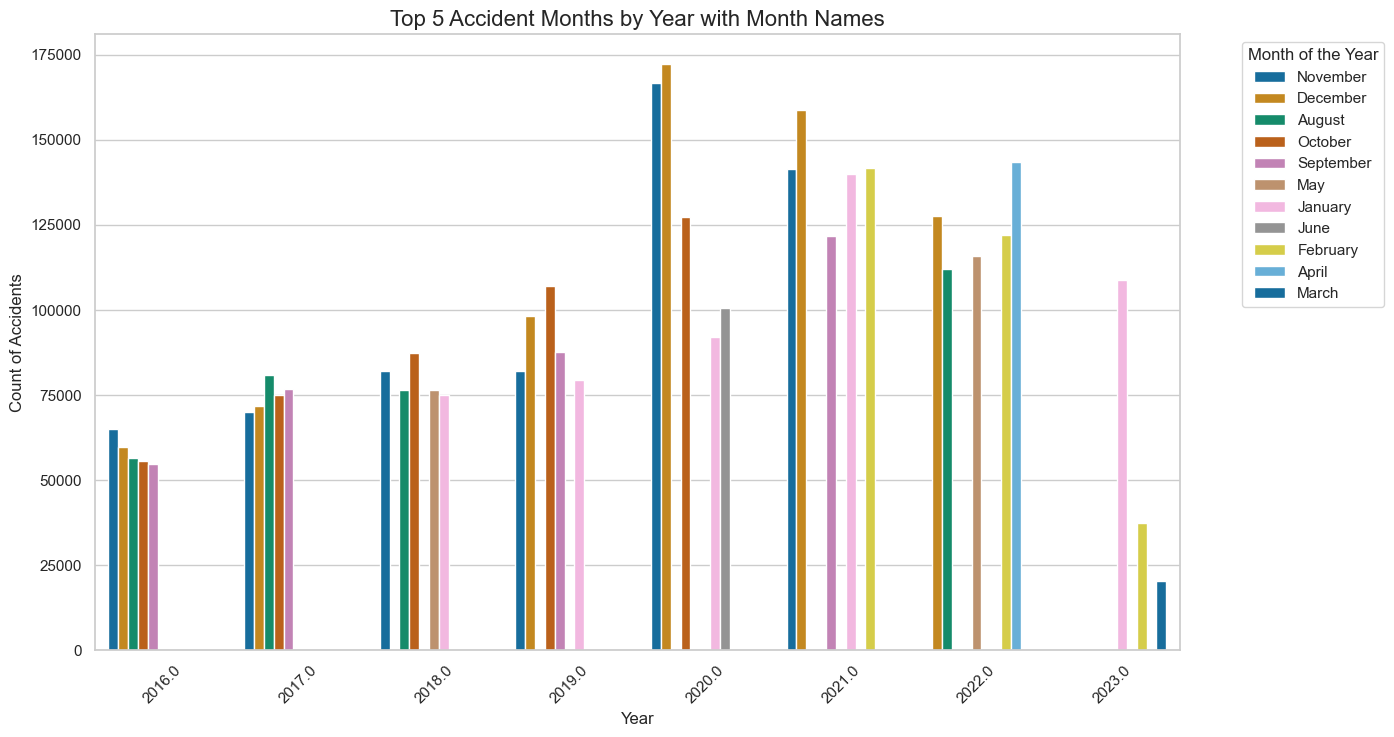

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Setting up the aesthetics for the plot
sns.set(style="whitegrid")

# Creating the plot for Top Accident Months
plt.figure(figsize=(14, 8))  # Set the figure size
month_chart = sns.barplot(x='Year', y='Count', hue='Month_Name', data=top_months, palette='colorblind')

# Adding titles and labels
plt.title('Top 5 Accident Months by Year with Month Names', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count of Accidents', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Month of the Year', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move the legend out of the plot to avoid overlapping with the bars

# Display the plot
plt.show()


In [19]:
co_df = df[df['State'] == 'CO']


In [20]:
# Group data by year and geographical coordinates (latitude and longitude)
grouped_data = co_df.groupby(['Year', 'Start_Lat', 'Start_Lng'])

# Count the number of accidents for each group
accident_counts = grouped_data.size().reset_index(name='Accident_Count')

# Find the accident hotspots in CO for each year
hotspots_by_year = {}
for year, group in accident_counts.groupby('Year'):
    hotspot_year = group.sort_values(by='Accident_Count', ascending=False).head(10)
    hotspots_by_year[year] = hotspot_year

# Print accident hotspots in CO for each year
for year, hotspots in hotspots_by_year.items():
    print(f"Accident Hotspots in Colorado for Year {year}:")
    print(hotspots)
    print()

Accident Hotspots in Colorado for Year 2016.0:
       Year  Start_Lat  Start_Lng  Accident_Count
774  2016.0   39.85183 -104.98631              18
792  2016.0   39.88935 -104.98768              15
783  2016.0   39.87186 -104.98770              13
580  2016.0   39.72823 -105.01465               8
681  2016.0   39.77543 -104.86141               8
781  2016.0   39.86111 -104.98747               7
339  2016.0   39.52518 -106.21529               6
291  2016.0   39.18985 -104.85064               6
433  2016.0   39.63965 -104.91083               6
290  2016.0   39.18638 -104.85025               6

Accident Hotspots in Colorado for Year 2017.0:
        Year  Start_Lat   Start_Lng  Accident_Count
4689  2017.0  39.848934 -104.985458              42
4790  2017.0  39.868027 -104.987701              33
4296  2017.0  39.780243 -104.989578              31
4863  2017.0  39.885189 -104.987442              30
3987  2017.0  39.761135 -105.004608              29
4874  2017.0  39.887016 -105.071922        

![Accident hotspot - CO](./images/CO_HOTSPOT.png)

